In [63]:
#!pip install ydata-profiling
#!pip install researchpy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn

#Libraries for penalised regressions
from numpy import arange
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, Lasso, Ridge, ElasticNet
from sklearn.model_selection import RepeatedKFold,  cross_val_score
from itertools import product

#Pour le test ESD
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import chi2_contingency

#Descriptive analysis
from ydata_profiling import ProfileReport

#Up_Sampling
from imblearn.over_sampling import RandomOverSampler

#Over_Sampling
from imblearn.over_sampling import SMOTE

#Réequilibrage de nos données
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

#Régression logstique
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

#XGBOOST
import xgboost as xgb

#Outliers removal/correction
from scipy.stats.mstats import winsorize

#Analyse de deux variables qualit
import researchpy as rp

In [2]:
df= pd.read_excel("E:/Master2/Semestre1/SVM/data.xlsx")

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [63]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


Par soucis de simplicité nous renommons les variable

In [3]:
df.columns = ['target','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18',
              'x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30','x31','x32','x33','x34','x35','x36','x37',
              'x38','x39','x40','x41','x42','x43','x44','x45','x46','x47','x48','x49','x50','x51','x52','x53','x54','x55','x56',
              'x57','x58','x59','x60','x61','x62','x63','x64','x65','x66','x67','x68','x69','x70','x71','x72','x73','x74','x75',
              'x76','x77','x78','x79','x80','x81','x82','x83','x84','x85','x86','x87','x88','x89','x90','x91','x92','x93','x94',
              'x95']

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  6819 non-null   int64  
 1   x1      6819 non-null   float64
 2   x2      6819 non-null   float64
 3   x3      6819 non-null   float64
 4   x4      6819 non-null   float64
 5   x5      6819 non-null   float64
 6   x6      6819 non-null   float64
 7   x7      6819 non-null   float64
 8   x8      6819 non-null   float64
 9   x9      6819 non-null   float64
 10  x10     6819 non-null   float64
 11  x11     6819 non-null   float64
 12  x12     6819 non-null   float64
 13  x13     6819 non-null   float64
 14  x14     6819 non-null   float64
 15  x15     6819 non-null   float64
 16  x16     6819 non-null   float64
 17  x17     6819 non-null   float64
 18  x18     6819 non-null   float64
 19  x19     6819 non-null   float64
 20  x20     6819 non-null   float64
 21  x21     6819 non-null   float64
 22  

(6819, 96)

## Nettoyage de la base de donnée

### Gestion des valeurs manquantes et des doublons

In [5]:
# Decompte du nombre de doublon
df.duplicated().sum() 

0

In [6]:
# Visualisation du nombre de valeurs manquantes
na = df.isna().sum()/df.shape[0]*100
na.sort_values()

target    0.0
x69       0.0
x68       0.0
x67       0.0
x66       0.0
         ... 
x27       0.0
x26       0.0
x25       0.0
x94       0.0
x95       0.0
Length: 96, dtype: float64

### Traitement des Outliers

Cette fonction défini comme Outliers l'ensemble des données qui sont en déhors de l'intervale inter quartile pour chaque variable. Vu le nombre d'outlier par rapport à la taille de la base, nous décidons de supprimer les outliers

Source: https://www.kaggle.com/code/marto24/bankruptcy-detection?scriptVersionId=56676526&cellId=26

In [7]:
%%time
# Traitements des outliers graçe à cette fonction trouve

def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile (feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for x in df:
    df2 = outliers_removal(df[x],str(x),df) ;
    
#Source : https://www.kaggle.com/code/marto24/bankruptcy-detection?scriptVersionId=56676526&cellId=26

Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
target Lower: 0.0
target Upper: 0.0
target outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.476527080388047 | Quartile 75: 0.535562813825379
iqr: 0.05903573343733198
Cut Off: 0.08855360015599797
x1 Lower: 0.38797348023204903
x1 Upper: 0.624116413981377
x1 outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.53554295682512 | Quartile 75: 0.58915721761884
iqr: 0.05361426079372
Cut Off: 0.08042139119058
x2 Lower: 0.45512156563454
x2 Upper: 0.66957860880942
x2 outliers for close to bankruptcy cases: 561
-----------------------------------------------------------------
Quartile 25: 0.527276620804112 | Quartile 75: 0.584105144815033
iqr: 0.05682852401092098
Cut Off: 0.08524278601638147
x3 Lower: 0.4420338347877305
x3 Upper: 0.6693479308314144
x3 outliers for close to bankruptcy cases: 432


-----------------------------------------------------------------
Quartile 25: 4860000000.0 | Quartile 75: 7390000000.0
iqr: 2530000000.0
Cut Off: 3795000000.0
x29 Lower: 1065000000.0
x29 Upper: 11185000000.0
x29 outliers for close to bankruptcy cases: 1381
-----------------------------------------------------------------
Quartile 25: 0.0004409688868264 | Quartile 75: 0.000499362141038
iqr: 5.839325421160002e-05
Cut Off: 8.758988131740003e-05
x30 Lower: 0.00035337900550899996
x30 Upper: 0.0005869520223554
x30 outliers for close to bankruptcy cases: 792
-----------------------------------------------------------------
Quartile 25: 0.263758926420651 | Quartile 75: 0.264388341065032
iqr: 0.0006294146443809878
Cut Off: 0.0009441219665714817
x31 Lower: 0.26281480445407956
x31 Upper: 0.2653324630316035
x31 outliers for close to bankruptcy cases: 674
-----------------------------------------------------------------
Quartile 25: 0.37474851905666695 | Quartile 75: 0.386731120301032
iqr: 0.01198

Quartile 25: 0.0031631476746991002 | Quartile 75: 0.011146766748190151
iqr: 0.007983619073491051
Cut Off: 0.011975428610236576
x63 Lower: -0.008812280935537476
x63 Upper: 0.023122195358426727
x63 outliers for close to bankruptcy cases: 426
-----------------------------------------------------------------
Quartile 25: 0.6269807662218725 | Quartile 75: 0.942026693700069
iqr: 0.3150459274781965
Cut Off: 0.47256889121729473
x64 Lower: 0.15441187500457776
x64 Upper: 1.4145955849173637
x64 outliers for close to bankruptcy cases: 40
-----------------------------------------------------------------
Quartile 25: 0.733611818564342 | Quartile 75: 0.738559910578823
iqr: 0.004948092014480987
Cut Off: 0.0074221380217214805
x65 Lower: 0.7261896805426205
x65 Upper: 0.7459820486005444
x65 outliers for close to bankruptcy cases: 153
-----------------------------------------------------------------
Quartile 25: 0.328095841686878 | Quartile 75: 0.332322404809702
iqr: 0.00422656312282399
Cut Off: 0.0063398

In [8]:
# Affichage du nombre de lignes supprimées
df2.shape, df.shape
diff = len(df.axes[0]) - len(df2.axes[0])

print ("Après le traitement des outliers nous nous retrouvons avec", diff, "observations en moins")

Après le traitement des outliers nous nous retrouvons avec 549 observations en moins


## Statistiques descriptives

In [9]:
# Séparation de la base de donnée: on isole la target
target= df2['target']
X= df2.drop(['target'], axis=1)

In [72]:
# Statistiques descriptives
X.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95
count,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,...,6270.000000,6.270000e+03,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.0,6270.000000
mean,0.505080,0.558403,0.553447,0.607232,0.607211,0.998754,0.797187,0.809079,0.303621,0.781380,...,0.807503,1.594482e+07,0.623764,0.607230,0.840366,0.280795,0.027606,0.565373,1.0,0.037347
std,0.059819,0.064196,0.060618,0.013592,0.013571,0.013558,0.013402,0.014170,0.011635,0.013207,...,0.039779,3.395291e+08,0.010699,0.013592,0.015128,0.015007,0.016338,0.013779,0.0,0.018390
min,0.000000,0.000000,0.000000,0.432653,0.432653,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.432654,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.476966,0.536143,0.527772,0.600225,0.600212,0.998971,0.797387,0.809312,0.303465,0.781568,...,0.796907,9.559032e-04,0.623622,0.600224,0.840129,0.277347,0.026791,0.565158,1.0,0.023761
50%,0.502754,0.559693,0.552278,0.605525,0.605511,0.999021,0.797460,0.809373,0.303523,0.781633,...,0.810372,2.171467e-03,0.623855,0.605523,0.841210,0.279112,0.026815,0.565283,1.0,0.032041
75%,0.534637,0.588121,0.582941,0.612858,0.612792,0.999088,0.797568,0.809460,0.303580,0.781726,...,0.825821,5.533255e-03,0.624119,0.612856,0.842381,0.281803,0.026928,0.565795,1.0,0.046423
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.999778,1.000000,1.000000,1.000000,1.000000,...,0.981315,9.820000e+09,0.956387,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.095322


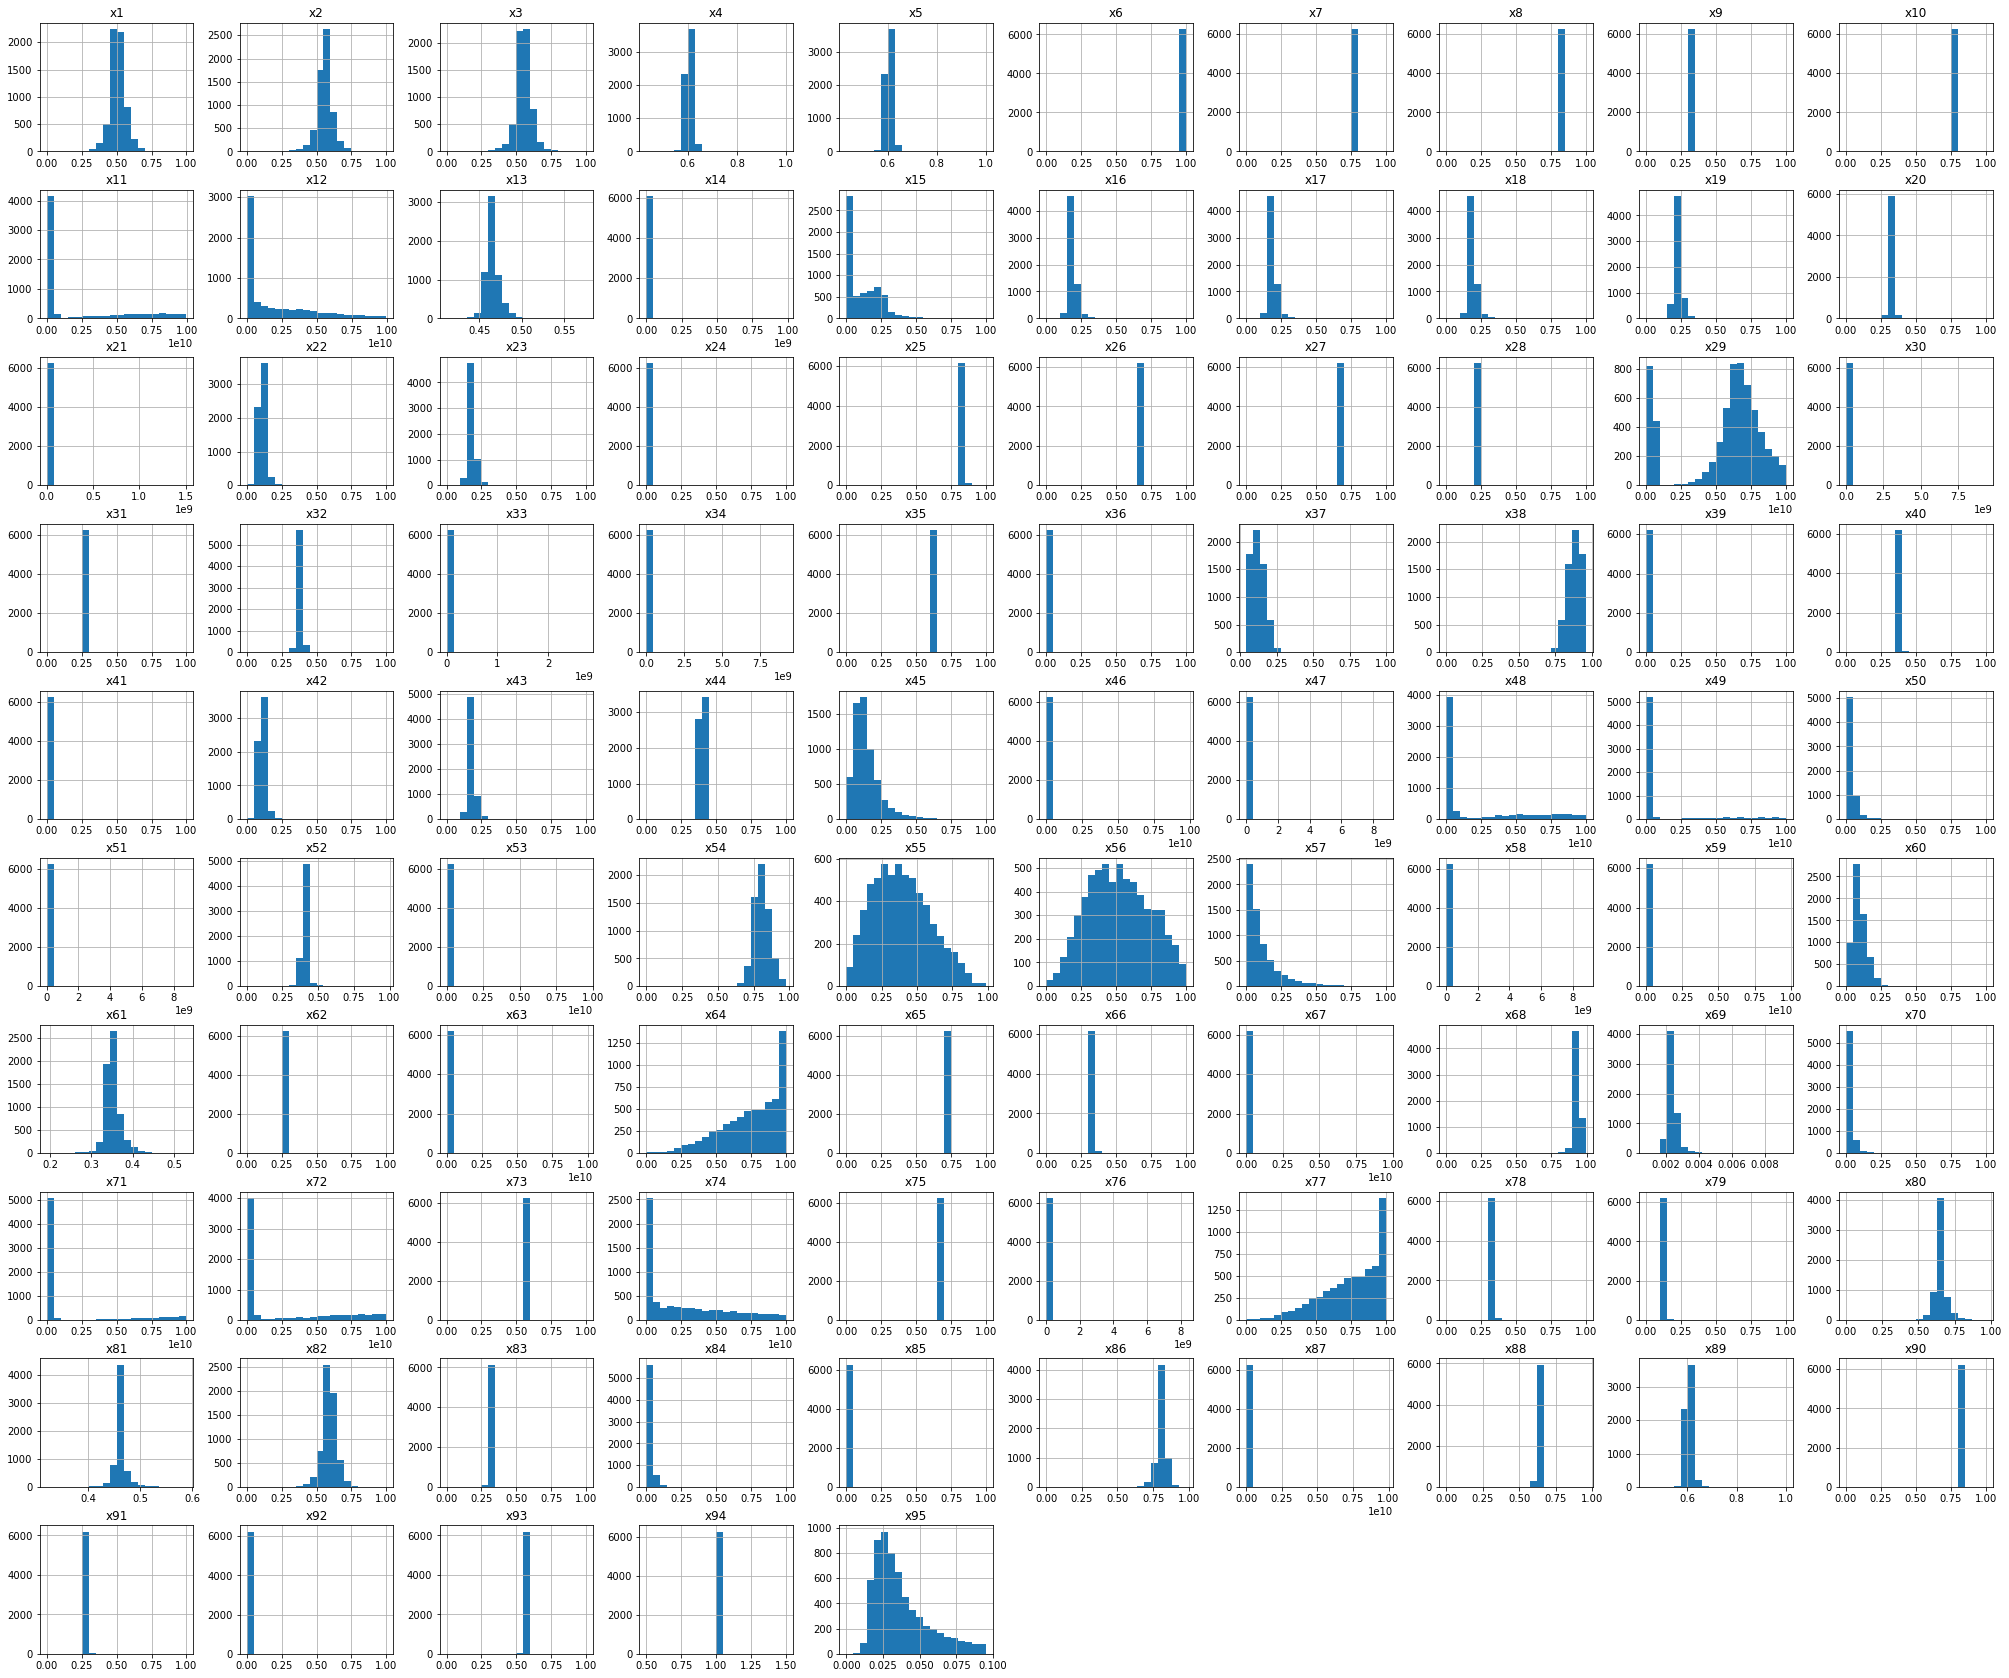

Wall time: 23.3 s


In [73]:
%%time
# Affichache de la repartition des données par variables
X.hist(figsize = (35,30), bins = 20)
plt.show()

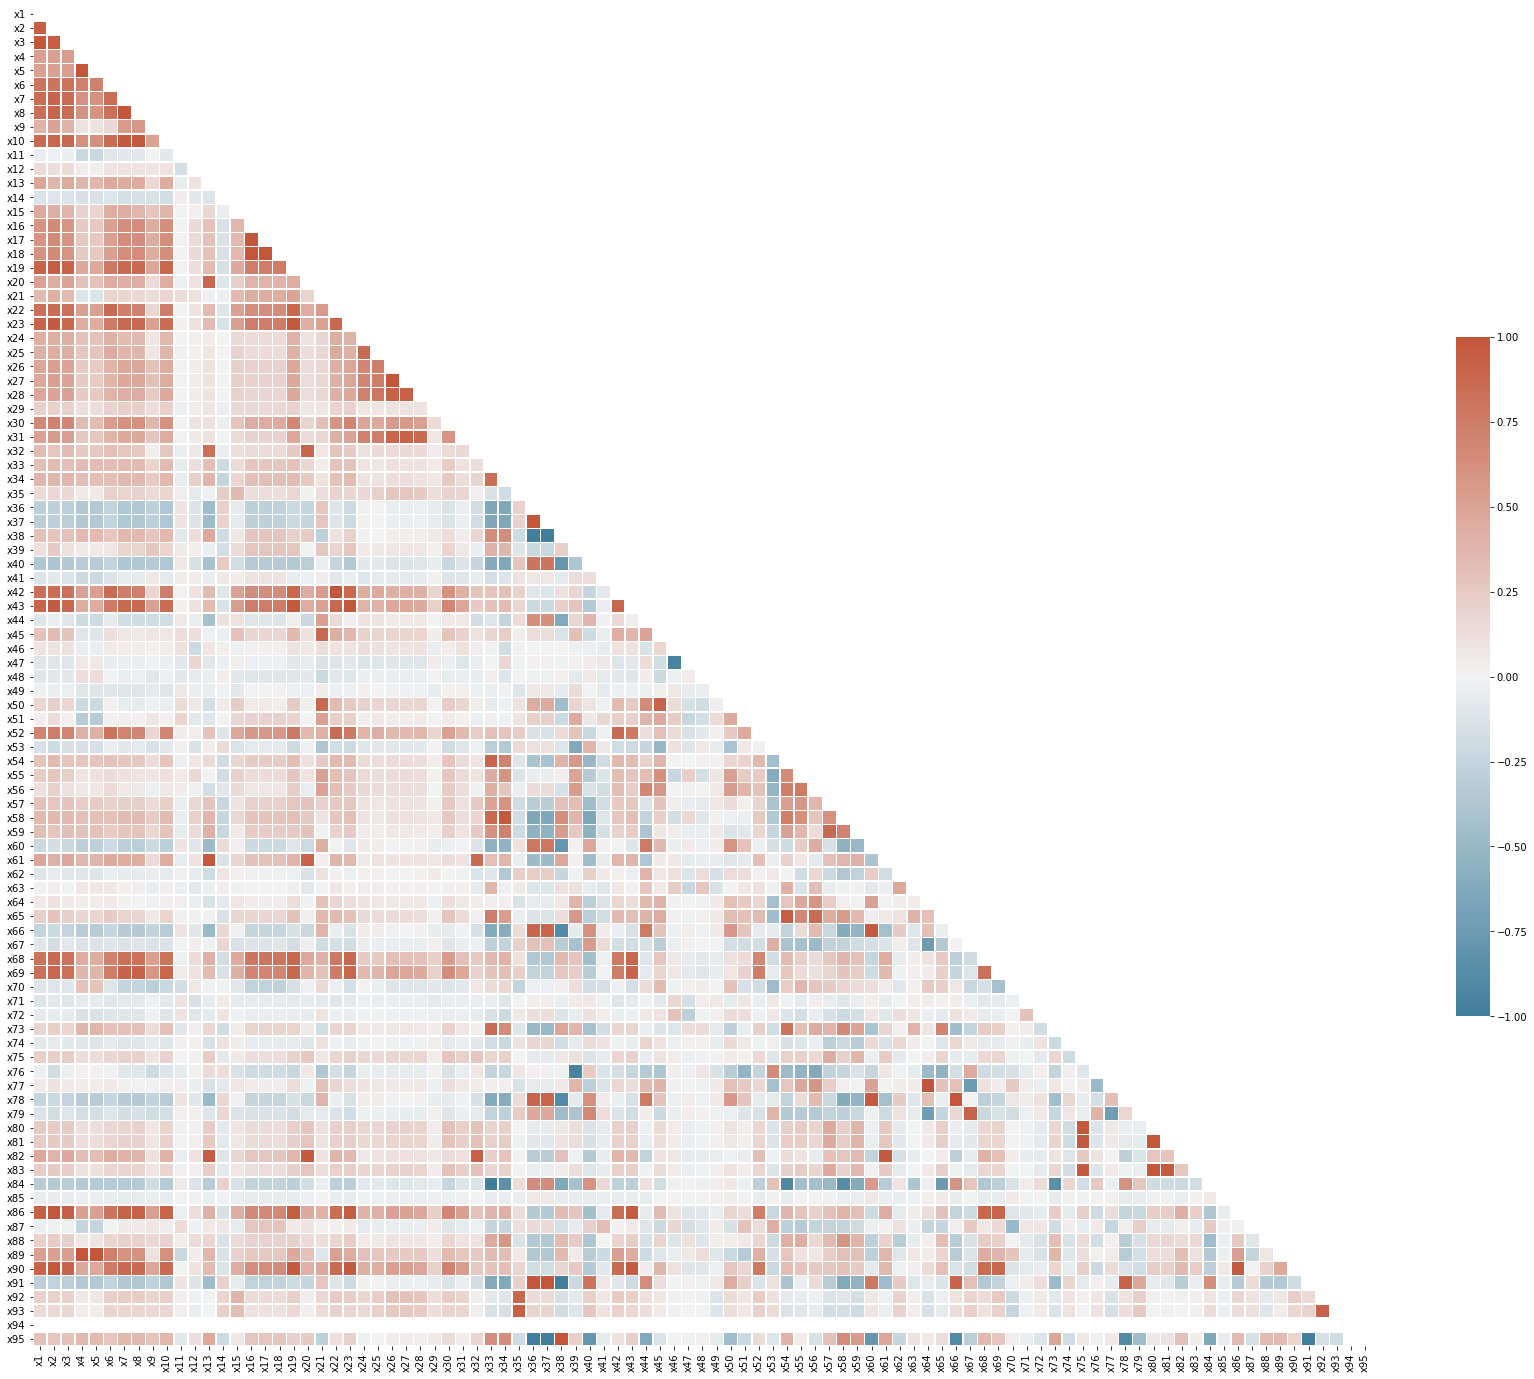

Wall time: 12.3 s


In [74]:
%%time
# Matrice de corrélation
f, ax = plt.subplots(figsize=(30, 25))
mat = X.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

 Nous pouvons visuellement constater des corrélations fortes de la base de données

### Recodage des variables catégorielles

In [10]:
# Implementation des type booléen sur les features
for col_name in X.columns:
    if(X[col_name].dtype == 'int64'):
        X[col_name]= X[col_name].astype('bool')
        
# Implementation du type booléen sur la target
target= target.astype(bool)


In [76]:
X.info()
X.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6270 entries, 0 to 6817
Data columns (total 95 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      6270 non-null   float64
 1   x2      6270 non-null   float64
 2   x3      6270 non-null   float64
 3   x4      6270 non-null   float64
 4   x5      6270 non-null   float64
 5   x6      6270 non-null   float64
 6   x7      6270 non-null   float64
 7   x8      6270 non-null   float64
 8   x9      6270 non-null   float64
 9   x10     6270 non-null   float64
 10  x11     6270 non-null   float64
 11  x12     6270 non-null   float64
 12  x13     6270 non-null   float64
 13  x14     6270 non-null   float64
 14  x15     6270 non-null   float64
 15  x16     6270 non-null   float64
 16  x17     6270 non-null   float64
 17  x18     6270 non-null   float64
 18  x19     6270 non-null   float64
 19  x20     6270 non-null   float64
 20  x21     6270 non-null   float64
 21  x22     6270 non-null   float64
 22  

(6270, 95)

In [11]:
# On vérifie la répartition des variables booléens
rp.summary_cat(X[["x85", "x94"]])

,Variable,Outcome,Count,Percent
0,x85,False,6262,99.87
1,,True,8,0.13
2,x94,True,6270,100.00


Nous remarquons que la variable x94 est constitué de 100% de TRUE. Nous decidons de la supprimer car elle n'a pas d'intérêt 
explicatif

In [12]:
X= X.drop(['x94'], axis=1)

In [13]:
# On verifie l'équilibre la répartition de  la target
target.value_counts(normalize=True)

False    0.965231
True     0.034769
Name: target, dtype: float64

Text(0.5, 1.0, 'Target feature - Bankrupt?')

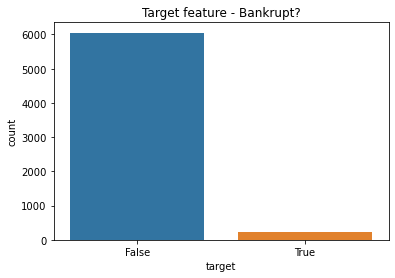

In [14]:
sns.countplot(x=target)
plt.title('Target feature - Bankrupt?')

## Oversampling

Text(0.5, 1.0, 'Target feature - Bankrupt?')

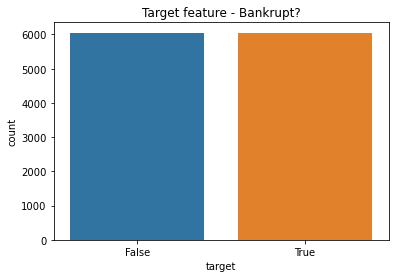

In [15]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_ro, Y_ro =oversample.fit_resample(X,target)
sns.countplot(x=Y_ro)
plt.title('Target feature - Bankrupt?')

In [16]:
Y_ro.value_counts(normalize=True)

False    0.5
True     0.5
Name: target, dtype: float64

# <center>Modelisation sans feature selection<center>

## Standardisation et Split

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scale=scaler.fit_transform(X_ro)
X_scale= X_ro

#On standardise les variables numériques sans toucher les booléens
scaler.fit_transform(X_scale[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18',
              'x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30','x31','x32','x33','x34','x35','x36','x37',
              'x38','x39','x40','x41','x42','x43','x44','x45','x46','x47','x48','x49','x50','x51','x52','x53','x54','x55','x56',
              'x57','x58','x59','x60','x61','x62','x63','x64','x65','x66','x67','x68','x69','x70','x71','x72','x73','x74','x75',
              'x76','x77','x78','x79','x80','x81','x82','x83','x84','x86','x87','x88','x89','x90','x91','x92','x93','x95']].values)


array([[-1.22520197e+00, -9.50356088e-01, -1.28062534e+00, ...,
        -9.03156669e-02, -1.10201719e-01, -7.73888523e-01],
       [ 8.66220953e-03,  3.05478797e-01,  8.75932246e-02, ...,
         1.56318494e+01,  4.67847366e-01, -5.09975424e-01],
       [-4.94641388e-01, -1.26966261e-01, -4.60222215e-01, ...,
        -9.33488183e-02, -1.42671099e-01, -7.73560678e-01],
       ...,
       [ 4.11884561e-01,  4.64816774e-01,  4.14165669e-01, ...,
         1.56885817e-01,  1.34619711e-01,  2.86064450e-01],
       [-5.82841688e-01, -1.43607146e+00, -6.81694393e-01, ...,
        -9.06669652e-02, -1.23330077e-01, -7.02373148e-01],
       [-1.51016498e+00, -1.57330632e+00, -1.50351069e+00, ...,
        -8.46254183e-02, -5.96208961e-02, -9.76536554e-01]])

In [18]:
X_scale

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x85,x86,x87,x88,x89,x90,x91,x92,x93,x95
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,False,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,False,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,False,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,False,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,False,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12099,0.416193,0.466053,0.459330,0.587742,0.587742,0.998747,0.797015,0.808964,0.303334,0.781207,...,False,0.746810,0.005715,0.622286,0.587742,0.832450,0.289746,0.026590,0.563894,0.016962
12100,0.460411,0.515989,0.511710,0.599817,0.599817,0.999011,0.797272,0.809201,0.303232,0.781451,...,False,0.781788,0.011474,0.633195,0.599816,0.838795,0.282840,0.028912,0.567068,0.022645
12101,0.494911,0.552656,0.543219,0.600747,0.600747,0.999036,0.797451,0.809361,0.303493,0.781621,...,False,0.805500,0.002856,0.627681,0.600744,0.840736,0.280495,0.030342,0.566644,0.033841
12102,0.419374,0.380366,0.454331,0.593308,0.593354,0.998745,0.796681,0.808606,0.302755,0.781077,...,True,0.684365,0.006690,0.623074,0.593305,0.864713,0.259268,0.026595,0.563911,0.017641


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scale, Y_ro, test_size=0.3)

In [20]:
X_test.shape

(3632, 94)

In [21]:
X_train.shape

(8472, 94)

# <center>Modelisation et feature selection<center>

## Feature selection

### Feature selection avec SDG : Pénalité ElasticNet - Base2

In [22]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest
from sklearn.linear_model import SGDClassifier

In [90]:
%%time
from sklearn.linear_model import SGDClassifier
selector = SelectFromModel(SGDClassifier(penalty='elasticnet',random_state=2042), threshold='mean')
selector.fit_transform(X_scale,Y_ro)
selector.get_support()

#On affiche les vriable retenues
np.array(X_scale.columns)[selector.get_support()]

Wall time: 2.76 s


array(['x14', 'x21', 'x30', 'x33', 'x46', 'x47', 'x51', 'x53', 'x58',
       'x76'], dtype=object)

In [91]:
X2= X_scale[['x14', 'x21', 'x30', 'x33', 'x46', 'x47', 'x51', 'x53', 'x58',
       'x76']]

In [92]:
X2.shape

(12104, 10)

### Feature selection avec Lasso : Base 3

In [93]:
%%time
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=14)

#define model
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)

#fit model
model.fit(X_scale, Y_ro)

#display lambda that produced the lowest test MSE
print(model.alpha_)

C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective di

C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent 

C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective di

0.01
Wall time: 5.19 s


C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 557.2515669647141, tolerance: 0.272349990820637
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 554.0336260207926, tolerance: 0.2723499908206369
  model = cd_fast.enet_coordinate_descent_gram(


Pour de la création de la troisième base avec un modèle lasso. Nous nous servons d'un grid search afin d'avoir le meilleur alpha pour le modèle Lasso

In [94]:
# initialisation du modèle
pipeline = Pipeline([('model', Lasso())])

search = GridSearchCV(pipeline, {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 10, scoring="neg_mean_squared_error",verbose=3)
search 

GridSearchCV(cv=10, estimator=Pipeline(steps=[('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [29]:
# Initialistion de l'apprentissage
search.fit(X_train,Y_train) ;

# On affiche les meilleur alpha
search.best_params_

Fitting 10 folds for each of 99 candidates, totalling 990 fits
[CV 1/10] END ................model__alpha=0.1;, score=-0.225 total time=   0.1s
[CV 2/10] END ................model__alpha=0.1;, score=-0.231 total time=   0.1s
[CV 3/10] END ................model__alpha=0.1;, score=-0.225 total time=   0.0s
[CV 4/10] END ................model__alpha=0.1;, score=-0.228 total time=   0.1s
[CV 5/10] END ................model__alpha=0.1;, score=-0.227 total time=   0.2s
[CV 6/10] END ................model__alpha=0.1;, score=-0.232 total time=   0.1s
[CV 7/10] END ................model__alpha=0.1;, score=-0.229 total time=   0.2s
[CV 8/10] END ................model__alpha=0.1;, score=-0.224 total time=   0.0s
[CV 9/10] END ................model__alpha=0.1;, score=-0.226 total time=   0.1s
[CV 10/10] END ...............model__alpha=0.1;, score=-0.225 total time=   0.3s
[CV 1/10] END ................model__alpha=0.2;, score=-0.225 total time=   0.2s
[CV 2/10] END ................model__alpha=0.2

[CV 2/10] END ................model__alpha=1.1;, score=-0.231 total time=   0.1s
[CV 3/10] END ................model__alpha=1.1;, score=-0.225 total time=   0.1s
[CV 4/10] END ................model__alpha=1.1;, score=-0.228 total time=   0.1s
[CV 5/10] END ................model__alpha=1.1;, score=-0.227 total time=   0.1s
[CV 6/10] END ................model__alpha=1.1;, score=-0.232 total time=   0.1s
[CV 7/10] END ................model__alpha=1.1;, score=-0.229 total time=   0.1s
[CV 8/10] END ................model__alpha=1.1;, score=-0.224 total time=   0.1s
[CV 9/10] END ................model__alpha=1.1;, score=-0.226 total time=   0.1s
[CV 10/10] END ...............model__alpha=1.1;, score=-0.225 total time=   0.0s
[CV 1/10] END .model__alpha=1.2000000000000002;, score=-0.225 total time=   0.0s
[CV 2/10] END .model__alpha=1.2000000000000002;, score=-0.231 total time=   0.0s
[CV 3/10] END .model__alpha=1.2000000000000002;, score=-0.225 total time=   0.1s
[CV 4/10] END .model__alpha=

[CV 4/10] END ................model__alpha=2.1;, score=-0.228 total time=   0.1s
[CV 5/10] END ................model__alpha=2.1;, score=-0.227 total time=   0.0s
[CV 6/10] END ................model__alpha=2.1;, score=-0.232 total time=   0.0s
[CV 7/10] END ................model__alpha=2.1;, score=-0.229 total time=   0.0s
[CV 8/10] END ................model__alpha=2.1;, score=-0.224 total time=   0.0s
[CV 9/10] END ................model__alpha=2.1;, score=-0.226 total time=   0.0s
[CV 10/10] END ...............model__alpha=2.1;, score=-0.225 total time=   0.0s
[CV 1/10] END ................model__alpha=2.2;, score=-0.225 total time=   0.0s
[CV 2/10] END ................model__alpha=2.2;, score=-0.231 total time=   0.0s
[CV 3/10] END ................model__alpha=2.2;, score=-0.225 total time=   0.0s
[CV 4/10] END ................model__alpha=2.2;, score=-0.228 total time=   0.1s
[CV 5/10] END ................model__alpha=2.2;, score=-0.227 total time=   0.0s
[CV 6/10] END ..............

[CV 6/10] END ................model__alpha=3.1;, score=-0.232 total time=   0.0s
[CV 7/10] END ................model__alpha=3.1;, score=-0.229 total time=   0.1s
[CV 8/10] END ................model__alpha=3.1;, score=-0.224 total time=   0.0s
[CV 9/10] END ................model__alpha=3.1;, score=-0.226 total time=   0.0s
[CV 10/10] END ...............model__alpha=3.1;, score=-0.225 total time=   0.0s
[CV 1/10] END ................model__alpha=3.2;, score=-0.225 total time=   0.0s
[CV 2/10] END ................model__alpha=3.2;, score=-0.231 total time=   0.0s
[CV 3/10] END ................model__alpha=3.2;, score=-0.225 total time=   0.0s
[CV 4/10] END ................model__alpha=3.2;, score=-0.228 total time=   0.0s
[CV 5/10] END ................model__alpha=3.2;, score=-0.227 total time=   0.0s
[CV 6/10] END ................model__alpha=3.2;, score=-0.232 total time=   0.0s
[CV 7/10] END ................model__alpha=3.2;, score=-0.229 total time=   0.0s
[CV 8/10] END ..............

[CV 8/10] END ................model__alpha=4.1;, score=-0.224 total time=   0.0s
[CV 9/10] END ................model__alpha=4.1;, score=-0.226 total time=   0.0s
[CV 10/10] END ...............model__alpha=4.1;, score=-0.225 total time=   0.0s
[CV 1/10] END ................model__alpha=4.2;, score=-0.225 total time=   0.0s
[CV 2/10] END ................model__alpha=4.2;, score=-0.231 total time=   0.0s
[CV 3/10] END ................model__alpha=4.2;, score=-0.225 total time=   0.0s
[CV 4/10] END ................model__alpha=4.2;, score=-0.228 total time=   0.0s
[CV 5/10] END ................model__alpha=4.2;, score=-0.227 total time=   0.0s
[CV 6/10] END ................model__alpha=4.2;, score=-0.232 total time=   0.0s
[CV 7/10] END ................model__alpha=4.2;, score=-0.229 total time=   0.0s
[CV 8/10] END ................model__alpha=4.2;, score=-0.224 total time=   0.0s
[CV 9/10] END ................model__alpha=4.2;, score=-0.226 total time=   0.0s
[CV 10/10] END .............

[CV 1/10] END ................model__alpha=5.2;, score=-0.225 total time=   0.0s
[CV 2/10] END ................model__alpha=5.2;, score=-0.231 total time=   0.0s
[CV 3/10] END ................model__alpha=5.2;, score=-0.225 total time=   0.0s
[CV 4/10] END ................model__alpha=5.2;, score=-0.228 total time=   0.0s
[CV 5/10] END ................model__alpha=5.2;, score=-0.227 total time=   0.0s
[CV 6/10] END ................model__alpha=5.2;, score=-0.232 total time=   0.0s
[CV 7/10] END ................model__alpha=5.2;, score=-0.229 total time=   0.0s
[CV 8/10] END ................model__alpha=5.2;, score=-0.224 total time=   0.0s
[CV 9/10] END ................model__alpha=5.2;, score=-0.226 total time=   0.0s
[CV 10/10] END ...............model__alpha=5.2;, score=-0.225 total time=   0.0s
[CV 1/10] END ................model__alpha=5.3;, score=-0.225 total time=   0.0s
[CV 2/10] END ................model__alpha=5.3;, score=-0.231 total time=   0.0s
[CV 3/10] END ..............

[CV 4/10] END ................model__alpha=6.2;, score=-0.228 total time=   0.0s
[CV 5/10] END ................model__alpha=6.2;, score=-0.227 total time=   0.0s
[CV 6/10] END ................model__alpha=6.2;, score=-0.232 total time=   0.1s
[CV 7/10] END ................model__alpha=6.2;, score=-0.229 total time=   0.0s
[CV 8/10] END ................model__alpha=6.2;, score=-0.224 total time=   0.0s
[CV 9/10] END ................model__alpha=6.2;, score=-0.226 total time=   0.0s
[CV 10/10] END ...............model__alpha=6.2;, score=-0.225 total time=   0.0s
[CV 1/10] END ................model__alpha=6.3;, score=-0.225 total time=   0.0s
[CV 2/10] END ................model__alpha=6.3;, score=-0.231 total time=   0.0s
[CV 3/10] END ................model__alpha=6.3;, score=-0.225 total time=   0.0s
[CV 4/10] END ................model__alpha=6.3;, score=-0.228 total time=   0.0s
[CV 5/10] END ................model__alpha=6.3;, score=-0.227 total time=   0.0s
[CV 6/10] END ..............

[CV 7/10] END ................model__alpha=7.2;, score=-0.229 total time=   0.0s
[CV 8/10] END ................model__alpha=7.2;, score=-0.224 total time=   0.0s
[CV 9/10] END ................model__alpha=7.2;, score=-0.226 total time=   0.0s
[CV 10/10] END ...............model__alpha=7.2;, score=-0.225 total time=   0.0s
[CV 1/10] END ................model__alpha=7.3;, score=-0.225 total time=   0.0s
[CV 2/10] END ................model__alpha=7.3;, score=-0.231 total time=   0.0s
[CV 3/10] END ................model__alpha=7.3;, score=-0.225 total time=   0.0s
[CV 4/10] END ................model__alpha=7.3;, score=-0.228 total time=   0.0s
[CV 5/10] END ................model__alpha=7.3;, score=-0.227 total time=   0.0s
[CV 6/10] END ................model__alpha=7.3;, score=-0.232 total time=   0.0s
[CV 7/10] END ................model__alpha=7.3;, score=-0.229 total time=   0.0s
[CV 8/10] END ................model__alpha=7.3;, score=-0.224 total time=   0.0s
[CV 9/10] END ..............

[CV 10/10] END ...............model__alpha=8.2;, score=-0.225 total time=   0.0s
[CV 1/10] END ................model__alpha=8.3;, score=-0.225 total time=   0.0s
[CV 2/10] END ................model__alpha=8.3;, score=-0.231 total time=   0.0s
[CV 3/10] END ................model__alpha=8.3;, score=-0.225 total time=   0.0s
[CV 4/10] END ................model__alpha=8.3;, score=-0.228 total time=   0.0s
[CV 5/10] END ................model__alpha=8.3;, score=-0.227 total time=   0.0s
[CV 6/10] END ................model__alpha=8.3;, score=-0.232 total time=   0.0s
[CV 7/10] END ................model__alpha=8.3;, score=-0.229 total time=   0.0s
[CV 8/10] END ................model__alpha=8.3;, score=-0.224 total time=   0.0s
[CV 9/10] END ................model__alpha=8.3;, score=-0.226 total time=   0.0s
[CV 10/10] END ...............model__alpha=8.3;, score=-0.225 total time=   0.0s
[CV 1/10] END ................model__alpha=8.4;, score=-0.225 total time=   0.0s
[CV 2/10] END ..............

[CV 3/10] END ................model__alpha=9.3;, score=-0.225 total time=   0.0s
[CV 4/10] END ................model__alpha=9.3;, score=-0.228 total time=   0.0s
[CV 5/10] END ................model__alpha=9.3;, score=-0.227 total time=   0.0s
[CV 6/10] END ................model__alpha=9.3;, score=-0.232 total time=   0.0s
[CV 7/10] END ................model__alpha=9.3;, score=-0.229 total time=   0.0s
[CV 8/10] END ................model__alpha=9.3;, score=-0.224 total time=   0.0s
[CV 9/10] END ................model__alpha=9.3;, score=-0.226 total time=   0.0s
[CV 10/10] END ...............model__alpha=9.3;, score=-0.225 total time=   0.0s
[CV 1/10] END ................model__alpha=9.4;, score=-0.225 total time=   0.0s
[CV 2/10] END ................model__alpha=9.4;, score=-0.231 total time=   0.0s
[CV 3/10] END ................model__alpha=9.4;, score=-0.225 total time=   0.0s
[CV 4/10] END ................model__alpha=9.4;, score=-0.228 total time=   0.0s
[CV 5/10] END ..............

{'model__alpha': 9.9}

In [30]:
#Objet contenant l'ensemble des coefficients du modèle
coefficients = search.best_estimator_.named_steps['model'].coef_

# On affiche les features ayant des coefficient non nulles
importance = np.abs(coefficients)
features = X.columns
np.array(features)[importance > 0]

array(['x11', 'x12', 'x14', 'x21', 'x29', 'x30', 'x34', 'x46', 'x47',
       'x48', 'x49', 'x51', 'x53', 'x58', 'x59', 'x63', 'x67', 'x71',
       'x72', 'x74', 'x76', 'x87'], dtype=object)

In [23]:
# Création d'une base avec les valeurs retenues
X3 = X_scale[['x11', 'x12', 'x14', 'x21', 'x29', 'x30', 'x34', 'x46', 'x47',
       'x48', 'x49', 'x51', 'x53', 'x58', 'x59', 'x63', 'x67', 'x71',
       'x72', 'x74', 'x76', 'x87']]

In [32]:
X3.shape

(12104, 22)

In [109]:
X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12104 entries, 0 to 12103
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x11     12104 non-null  float64
 1   x12     12104 non-null  float64
 2   x14     12104 non-null  float64
 3   x29     12104 non-null  float64
 4   x30     12104 non-null  float64
 5   x34     12104 non-null  float64
 6   x46     12104 non-null  float64
 7   x47     12104 non-null  float64
 8   x48     12104 non-null  float64
 9   x49     12104 non-null  float64
 10  x51     12104 non-null  float64
 11  x53     12104 non-null  float64
 12  x59     12104 non-null  float64
 13  x63     12104 non-null  float64
 14  x67     12104 non-null  float64
 15  x71     12104 non-null  float64
 16  x72     12104 non-null  float64
 17  x74     12104 non-null  float64
 18  x76     12104 non-null  float64
 19  x87     12104 non-null  float64
dtypes: float64(20)
memory usage: 1.8 MB


### Feature selection RFECV : base 4

In [33]:
%%time
from sklearn.feature_selection import RFECV
selector3= RFECV(SGDClassifier(penalty='elasticnet',random_state=2042), step=10, cv= 10)
selector3.fit_transform(X_scale,Y_ro)
selector3.get_support()

#On affiche les vriable retenues
np.array(X_scale.columns)[selector3.get_support()]

C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array(['x14', 'x21', 'x29', 'x30', 'x33', 'x46', 'x47', 'x51', 'x53',
       'x58', 'x59', 'x72', 'x76', 'x87'], dtype=object)

In [35]:
# Création d'une base avec les valeurs retenues
X4 = X_scale[['x14', 'x21', 'x29', 'x30', 'x33', 'x46', 'x47', 'x51', 'x53',
       'x58', 'x59', 'x72', 'x76', 'x87']]

In [36]:
X4.shape

(12104, 14)

## Statistiques descriptive de la base de donnée finale : base3

Procedure permettant permettant de faire le test de Student et de supprimer les variables dont la P-value depasse 0,05. Une P-value supérieur à 5% indique que les variations de notre target sont indépendentes des variations de la variables explicative concernée.

In [24]:
# Test de student en la target et les features

#base_lasso_2 = base_lasso.drop(['Bankruptcy'], axis = 1)

for  a in X3.columns:
        
        stat, p = ttest_ind(Y_ro,X3[a])
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Pour les variable',Y_ro.name,'et',X3[a].name,'les distributions sont similaires')
            print('La variable', X3[a].name, 'a été supprimée')
            del X3[a]
        else:
            print('Pour les variable',Y_ro.name,'et',X3[a].name,'les distributions sont différentes')

baset_cleaned = pd.concat([Y_ro, X3], axis=1)

stat=-65.959, p=0.000
Pour les variable target et x11 les distributions sont différentes
stat=-78.812, p=0.000
Pour les variable target et x12 les distributions sont différentes
stat=-13.249, p=0.000
Pour les variable target et x14 les distributions sont différentes
stat=-1.732, p=0.083
Pour les variable target et x21 les distributions sont similaires
La variable x21 a été supprimée
stat=-226.975, p=0.000
Pour les variable target et x29 les distributions sont différentes
stat=-5.354, p=0.000
Pour les variable target et x30 les distributions sont différentes
stat=-4.809, p=0.000
Pour les variable target et x34 les distributions sont différentes
stat=-4.241, p=0.000
Pour les variable target et x46 les distributions sont différentes
stat=-3.123, p=0.002
Pour les variable target et x47 les distributions sont différentes
stat=-74.275, p=0.000
Pour les variable target et x48 les distributions sont différentes
stat=-56.006, p=0.000
Pour les variable target et x49 les distributions sont différ

Deux variables on été retiré à la suite du test

In [25]:
X3.shape

(12104, 20)

In [98]:
Y_ro.shape

(12104,)

In [106]:
baset_cleaned

,target,x11,x12,x14,x29,x30,x34,x46,x47,x48,...,x51,x53,x59,x63,x67,x71,x72,x74,x76,x87
0,True,1.256969e-04,0.000000e+00,0.000725,4.980000e+09,0.000327,0.001208,0.001814,0.003487,1.820926e-04,...,0.034164,0.037135,1.473360e-04,1.035990e-03,0.025592,7.010000e+08,6.550000e+09,4.580000e+08,0.424206,0.009219
1,True,2.897851e-04,0.000000e+00,0.000647,6.110000e+09,0.000443,0.004039,0.001286,0.004917,9.360000e+09,...,0.006889,0.012335,1.383910e-03,5.209682e-03,0.023947,1.065198e-04,7.700000e+09,2.490000e+09,0.468828,0.008323
2,True,2.361297e-04,2.550000e+07,0.000790,7.280000e+09,0.000396,0.005348,0.001495,0.004227,6.500000e+07,...,0.028997,0.141016,5.340000e+09,1.387879e-02,0.003715,1.791094e-03,1.022676e-03,7.610000e+08,0.276179,0.040003
3,True,1.078888e-04,0.000000e+00,0.000449,4.880000e+09,0.000382,0.002896,0.001966,0.003215,7.130000e+09,...,0.015463,0.021320,1.010646e-03,3.540148e-03,0.022165,8.140000e+09,6.050000e+09,2.030000e+09,0.559144,0.003252
4,True,7.890000e+09,0.000000e+00,0.000686,5.510000e+09,0.000439,0.003727,0.001449,0.004367,1.633674e-04,...,0.058111,0.023988,6.804636e-04,4.868570e-03,0.000000,6.680000e+09,5.050000e+09,8.240000e+08,0.309555,0.003878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12099,True,1.241516e-04,1.191270e+09,0.000695,7.179701e+09,0.000411,0.001188,0.000846,0.007713,4.499697e+09,...,0.019526,0.071105,6.866975e-04,5.048400e-03,0.049253,1.993998e-04,9.145624e+09,3.599379e+09,0.483242,0.007554
12100,True,1.081759e-03,3.445767e-04,0.000403,4.348721e+09,0.000339,0.004011,0.000578,0.011936,9.323031e+08,...,0.003808,0.021418,7.737219e-03,1.451805e-02,0.028837,5.612617e-04,2.984513e-04,3.370382e-04,0.512787,0.000532
12101,True,1.531737e-04,1.343450e+09,0.000788,2.416060e+09,0.000357,0.000890,0.001522,0.004154,3.901063e+08,...,0.019461,0.031781,1.325936e-04,3.958041e-03,0.010430,7.986010e+09,3.661652e+09,4.349428e+08,0.633011,0.004713
12102,True,1.636188e-04,0.000000e+00,0.000678,4.726790e+09,0.000315,0.001142,0.001818,0.003480,5.420061e+08,...,0.031627,0.033354,2.097711e-04,1.855179e-03,0.025522,6.050540e+08,6.814160e+09,4.262461e+08,0.396914,0.008009


Procedure permettant de faire le test de Chi-2 sur les variables boléen

In [110]:
# # Création de la table de contingence
# data_crosstab = pd.crosstab(baset_cleaned['target'], baset_cleaned['x85'], margins=True, margins_name="Total")

# # Definition du seuil de confiance à 5%
# alpha = 0.05

# # Calcualtion of Chisquare

# chi_square = 0

# rows = baset_cleaned['target'].unique()

# columns = baset_cleaned['x85'].unique()

# for i in columns:
#     for j in rows:
#         O = data_crosstab[i][j]
#         E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
#         chi_square += (O-E)**2/E

# print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
# p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
# conclusion = "Failed to reject the null hypothesis."

# if p_value <= alpha:
#     conclusion = "Null Hypothesis is rejected."
        
# print("chisquare-score is:", chi_square, " and p value is:", p_value)
# print(conclusion)


#base_RFECV_cleaned = base_RFECV_cleaned.drop([' Net Income Flag'], axis = 1)
#source : https://towardsdatascience.com/chi-square-test-with-python-d8ba98117626

### Analyse multivariée

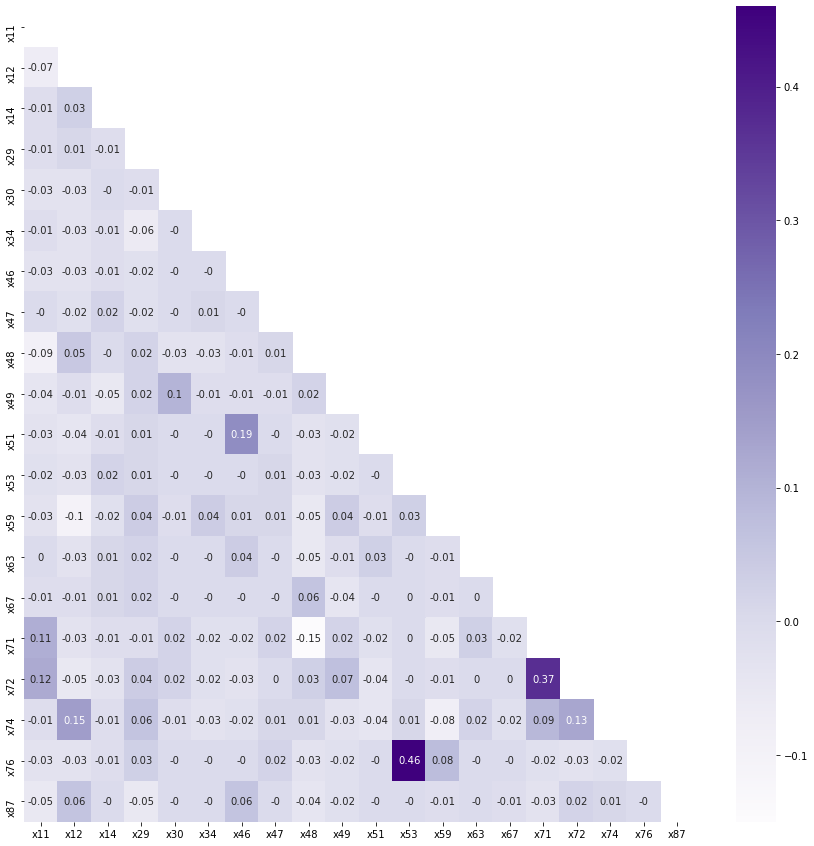

In [177]:
plt.figure(figsize=(15,15))
cor = round(X3.corr(),2)
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, annot=True, mask=mask, cmap=plt.cm.Purples)
plt.show()

## Modelisation

Nous lançons nos nos algorithme sur la base de données finale

In [28]:
# Plit pour le model 3
X3_train,X3_test,Y3_train,Y3_test=train_test_split(X3, Y_ro, test_size=0.3)

In [ ]:
# from sklearn.pipeline import Pipeline

# tex_clf= Pipeline([('tdghj', randomdforestclassifier()),
#                   'clf', LinearSVC()])

# tex_clf.fit(x_train, y_train)

### Regression logistique

Nous avons testé 3 types de solver et gardons celui avec les meilleurs résultats

Liste des solvers testés: lbfgs / newton-cb / saga

In [132]:
# Initialisation du modèle
log_reg=LogisticRegression(solver='saga')
log_reg.fit(X3_train,Y3_train)

# Les metrics
log_pred= log_reg.predict(X3_test)
print(classification_report(Y3_test,log_pred))

              precision    recall  f1-score   support

       False       0.58      0.75      0.66      1840
        True       0.64      0.45      0.53      1792

    accuracy                           0.60      3632
   macro avg       0.61      0.60      0.59      3632
weighted avg       0.61      0.60      0.59      3632



C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


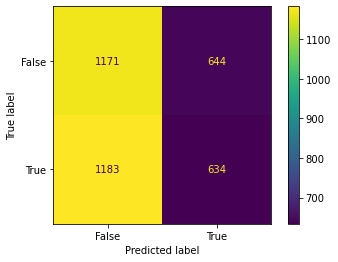

In [133]:
# Matrice de confusion
log_matrix= confusion_matrix(Y_test,log_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=log_matrix,
                             display_labels=log_reg.classes_)
disp.plot()
plt.show()

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
# Initialisation
rf = RandomForestClassifier()

In [29]:
%%time
# Modèle 3
rf.fit(X3_train, Y3_train)

#Metrics
rf_pred3= rf.predict(X3_test)
print(classification_report(Y3_test,rf_pred3))

              precision    recall  f1-score   support

       False       0.98      0.96      0.97      1807
        True       0.96      0.98      0.97      1825

    accuracy                           0.97      3632
   macro avg       0.97      0.97      0.97      3632
weighted avg       0.97      0.97      0.97      3632

Wall time: 7.31 s


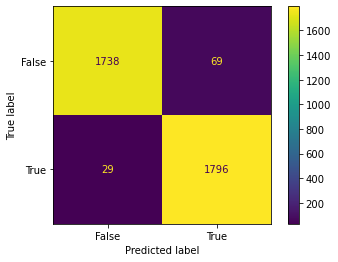

In [30]:
# Matrice de confusion
rf_matrix= confusion_matrix(Y3_test,rf_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_matrix,
                             display_labels=rf.classes_)
disp.plot()
plt.show()

### XG Boost

In [31]:
import xgboost as xgb
xg_boost= xgb.XGBClassifier()

In [32]:
%%time
# Modèle 3
xg_boost.fit(X3_train,Y3_train)
xgb_pred3= xg_boost.predict(X3_test)
print(classification_report(Y3_test,xgb_pred3))

              precision    recall  f1-score   support

       False       1.00      0.97      0.98      1807
        True       0.97      1.00      0.98      1825

    accuracy                           0.98      3632
   macro avg       0.98      0.98      0.98      3632
weighted avg       0.98      0.98      0.98      3632

Wall time: 2.56 s


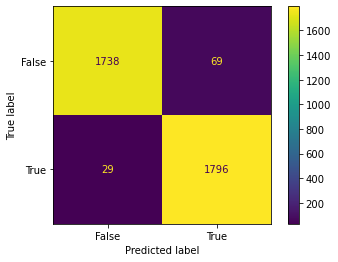

In [33]:
# Matrice de confusion
xgb_matrix= confusion_matrix(Y3_test,xgb_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_matrix,
                             display_labels=xg_boost.classes_)
disp.plot()
plt.show()

### SVM lineaire

In [115]:
from sklearn.svm import LinearSVC
svm_clf= LinearSVC()

In [116]:
%%time
# Modèle 3
svm_clf.fit(X3_train, Y3_train)
svm_clf3_pred= svm_clf.predict(X3_test)
print(classification_report(Y3_test,svm_clf3_pred))

              precision    recall  f1-score   support

       False       0.54      0.13      0.21      1840
        True       0.50      0.89      0.64      1792

    accuracy                           0.50      3632
   macro avg       0.52      0.51      0.42      3632
weighted avg       0.52      0.50      0.42      3632

Wall time: 1.98 s


C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### SVM non linéaire

In [34]:
from sklearn.svm import SVC
svc_clf= SVC(kernel="poly")

In [35]:
%%time
# Modèle 3
svc_clf.fit(X3_train, Y3_train)
svc_clf3_pred= svc_clf.predict(X3_test)
print(classification_report(Y3_test,svc_clf3_pred))

              precision    recall  f1-score   support

       False       0.81      0.65      0.72      1807
        True       0.71      0.85      0.78      1825

    accuracy                           0.75      3632
   macro avg       0.76      0.75      0.75      3632
weighted avg       0.76      0.75      0.75      3632

Wall time: 7.5 s


### Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
per_clf = Perceptron()
per_clf.fit(X3_train, Y3_train)

In [120]:
per_pred = per_clf.predict(X3_test)
print(classification_report(Y3_test,per_pred))

              precision    recall  f1-score   support

       False       0.63      0.11      0.19      1840
        True       0.51      0.93      0.66      1792

    accuracy                           0.52      3632
   macro avg       0.57      0.52      0.42      3632
weighted avg       0.57      0.52      0.42      3632



### ANN

In [121]:
%%time
#Import tensorflow et keras
import tensorflow as tf
from tensorflow import keras

#Initialisation
keras_model = keras.models.Sequential()

keras_model.add(keras.layers.Input(shape=X3_train.shape[1])) #input layer
keras_model.add(keras.layers.Dense(100, activation='relu')) #Hidden layer, 100 neurones
keras_model.add(keras.layers.Dense(1))#Output layer

#Définir fonction de perte
keras_model.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#binary_crossentropy / offrent des resultat similaires

Wall time: 13.2 s


In [122]:
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2300      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [124]:
#Transformation en nimpy
X_train_np = np.asarray(X3_train).astype(np.float32)
X_test_np = np.asarray(X3_test).astype(np.float32)
Y_train_np= np.asarray(Y3_train).astype(np.float32)
Y_test_np = np.asarray(Y3_test).astype(np.float32)

In [125]:
from keras.callbacks import History 
history = History()

In [126]:
%%time
# Entrainement
keras_model.fit(X_train_np, Y_train_np, epochs=30,validation_split=0.2, callbacks=[history])

Epoch 1/30
212/212 [==============================] - 2s 6ms/step - loss: 7.8129 - accuracy: 0.4925 - val_loss: 8.1652 - val_accuracy: 0.4696
Epoch 2/30
212/212 [==============================] - 1s 3ms/step - loss: 7.8039 - accuracy: 0.4931 - val_loss: 8.1834 - val_accuracy: 0.4684
Epoch 3/30
212/212 [==============================] - 1s 4ms/step - loss: 7.8040 - accuracy: 0.4931 - val_loss: 8.1834 - val_accuracy: 0.4684
Epoch 4/30
212/212 [==============================] - 1s 4ms/step - loss: 7.8018 - accuracy: 0.4933 - val_loss: 8.1834 - val_accuracy: 0.4684
Epoch 5/30
212/212 [==============================] - 1s 3ms/step - loss: 7.7973 - accuracy: 0.4936 - val_loss: 8.1654 - val_accuracy: 0.4696
Epoch 6/30
212/212 [==============================] - 1s 3ms/step - loss: 7.7996 - accuracy: 0.4934 - val_loss: 8.1654 - val_accuracy: 0.4696
Epoch 7/30
212/212 [==============================] - 1s 3ms/step - loss: 7.7974 - accuracy: 0.4936 - val_loss: 8.1654 - val_accuracy: 0.4696
Epoch 

In [127]:
# Évaluation du modèle : nous constatons un accuracy assez faible
keras_model.evaluate(X_test_np, Y_test_np)

114/114 [==============================] - 0s 2ms/step - loss: 7.5469 - accuracy: 0.5099


[7.546908855438232, 0.5099118947982788]

### Comparaison des modèles

In [134]:
%%time
log = cross_val_score(log_reg, X3_train, Y3_train, cv=10, scoring='accuracy')

perceptron = cross_val_score(per_clf, X3_train, Y3_train, cv=10, scoring='accuracy')

SVC = cross_val_score(svc_clf, X3_train, Y3_train, cv=10, scoring='accuracy')

SVM_L = cross_val_score(svm_clf, X3_train, Y3_train, cv=10, scoring='accuracy')

XG_Boost = cross_val_score(xg_boost, X3_train, Y3_train, cv=10, scoring='accuracy')

RF = cross_val_score(rf, X3_train, Y3_train, cv=10, scoring='accuracy')

C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Wall time: 3min 8s


In [138]:
#Get data output from cross_val_score
df_cross = pd.DataFrame(np.transpose(np.c_[log, perceptron, SVC, SVM_L, XG_Boost, RF]), 
                        columns=['fold1','fold2','fold3','fold4','fold5','fold6','fold7','fold8','fold9','fold10'])
#Adding model label
df_cross['model'] = ['log3', 'Perceptron', 'SVC', 'SVM_L', 'XG_Boost', 'RF']

In [137]:
df_cross

,fold1,fold2,fold3,fold4,fold5,fold6,fold7,fold8,fold9,fold10,model
0,0.599057,0.567217,0.625738,0.617473,0.618654,0.609209,0.612751,0.637544,0.595041,0.618654,log3
1,0.576651,0.527123,0.573790,0.517119,0.461629,0.526564,0.517119,0.550177,0.552538,0.565525,perceptron
2,0.755896,0.750000,0.752066,0.730815,0.768595,0.779221,0.766234,0.772137,0.752066,0.776860,SVC
3,0.459906,0.494104,0.499410,0.523022,0.537190,0.465171,0.528926,0.519481,0.527745,0.539551,SVM_L
4,0.984670,0.969340,0.974026,0.978749,0.985832,0.982290,0.988194,0.979929,0.979929,0.970484,XG_Boost
5,0.984670,0.965802,0.970484,0.971665,0.983471,0.977568,0.978749,0.982290,0.975207,0.965762,RF


In [139]:
df_cross.shape

(6, 11)

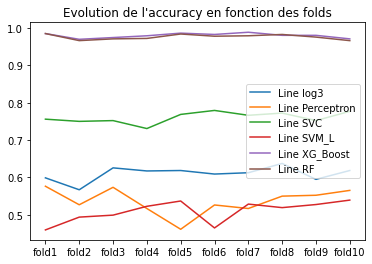

In [140]:
#Regardons l'évolution des scores pour chaque fold
for row in range(df_cross.shape[0]):
    plt.plot( df_cross.iloc[row,0:10] ,label='Line '+str(df_cross.iloc[row,10]))

plt.legend()
plt.title("Evolution de l'accuracy en fonction des folds")
plt.show()

In [170]:
d

{'log': 0.018422614563162968, 'perceptron': 0.03291178038092533}

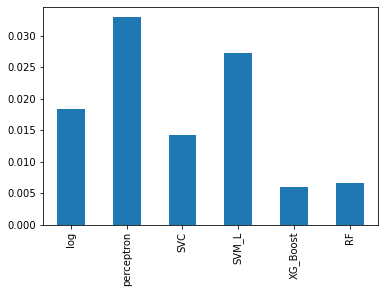

In [176]:
# Standar deviation:
std_log= log.std()
std_perceptron= perceptron.std()
std_SVC= SVC.std()
std_SVM_L= SVM_L.std()
std_XG_Boost= XG_Boost.std()
std_RF= RF.std()


df_std= pd.DataFrame([[std_log,std_perceptron, std_SVC,std_SVM_L,std_XG_Boost,std_RF]],columns=['log','perceptron','SVC','SVM_L','XG_Boost','RF'])

row = df_std.iloc[0]
row.plot(kind='bar')
plt.show()


In [156]:
std_log

0.018422614563162968

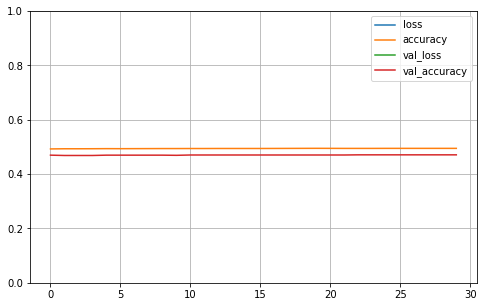

In [141]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

## Tunning

### SVM non linéaire

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[10,100,500],'gamma':[0.1,0.001,0.0001], 'kernel':['rbf', 'poly', 'sigmoid']}

In [38]:
param_grid

{'C': [10, 100, 500],
 'gamma': [0.1, 0.001, 0.0001],
 'kernel': ['rbf', 'poly', 'sigmoid']}

In [39]:
%%time
grid = GridSearchCV(svc_clf, param_grid ,refit = True, verbose=2)

grid.fit(X3_train,Y3_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   9.6s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   9.5s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   8.8s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   9.4s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   9.7s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   3.8s
[CV] END ....................C=10, gamma=0.1, k

[CV] END ...................C=500, gamma=0.1, kernel=sigmoid; total time=   3.2s
[CV] END ...................C=500, gamma=0.1, kernel=sigmoid; total time=   3.3s
[CV] END ...................C=500, gamma=0.1, kernel=sigmoid; total time=   3.6s
[CV] END ...................C=500, gamma=0.1, kernel=sigmoid; total time=   3.2s
[CV] END .....................C=500, gamma=0.001, kernel=rbf; total time=   8.9s
[CV] END .....................C=500, gamma=0.001, kernel=rbf; total time=   9.2s
[CV] END .....................C=500, gamma=0.001, kernel=rbf; total time=   8.7s
[CV] END .....................C=500, gamma=0.001, kernel=rbf; total time=   9.2s
[CV] END .....................C=500, gamma=0.001, kernel=rbf; total time=   9.1s
[CV] END ....................C=500, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=500, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=500, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 270, in fit
    raise ValueError(
ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to bepreprocessed.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\

Wall time: 10min 22s


GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [10, 100, 500], 'gamma': [0.1, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [40]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.1)


In [41]:
grid_predictions_svc = grid.predict(X3_test)
print(classification_report(Y3_test,grid_predictions_svc))

              precision    recall  f1-score   support

       False       1.00      0.02      0.03      1807
        True       0.51      1.00      0.67      1825

    accuracy                           0.51      3632
   macro avg       0.75      0.51      0.35      3632
weighted avg       0.75      0.51      0.35      3632



Pas d'amelioration au final du modèle SVM non linéaire